In [1]:

import sys
import os
sys.path.append('../')
from Codes.model import *
from Codes.utils import *


plt.style.use('default')

import pickle
RESULT_DIR = "../../ExptsPaper"
# os.mkdir(RESULT_DIR)
from timeit import default_timer
from sklearn.datasets import make_blobs

from tqdm.notebook import tqdm


In [2]:


def BlobsWithOutliers(N,D,K,box,seed, outliers):

    generator = np.random.RandomState(seed)
    center_box = [0,box]

    centers = generator.uniform(center_box[0], center_box[1], size=(K, D))

    X, y = make_blobs(n_samples=N, centers=centers, n_features=D, cluster_std = 1,
                    random_state=seed)


    X1 = generator.uniform(low = [0,0], high = [box, box ], size = (outliers,2) )

    X = np.append(X, X1,axis = 0)

    y = np.append(y, len(X1)*[K], axis = 0)


    cols = [ 'X' + str(i+1) for i in range(D) ]

    df_data = pd.DataFrame(X, columns = cols)
  

    return df_data, X,y, centers




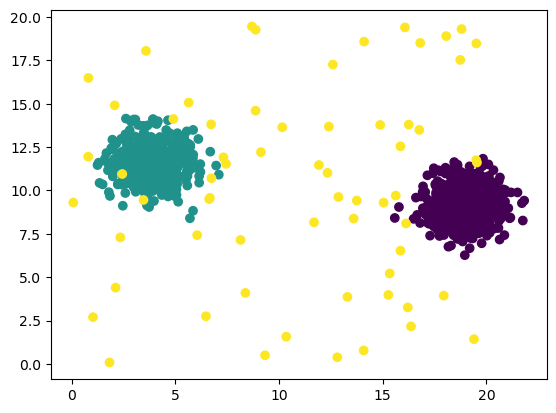

5.082531176657372

In [3]:

N = 1000
D = 2
K = 2
box = 20
seed = 37
outliers = 64

df_data, X,y, centers = BlobsWithOutliers(N,D,K,box,seed, outliers)

cik = np.zeros((N,K))
for i in range(N):

    cik[i,y[i]] = 1

_,ax = plt.subplots(1)
plt.scatter(X[:,0], X[:,1], c = y)
plt.show()     

dist = manhattan_distances(X[:1000,:],centers)
distM = dist*cik
np.max(distM)

## kc-Opt for Dataset1

In [5]:

outliers_list = [4,8,16,32,64]
optgap_list=[]

time_list = []
metrics_list = []

obj_list = []
constrsCnt_list = []

maxdist_list = []

for i, outliers in enumerate(tqdm(outliers_list)):



    print('\nStarting outliers = %i' %(outliers))

    df_data, X,y,_ = BlobsWithOutliers(N,D,K,box,seed, outliers)

    clus = UnsupervisedClustering(K =K , max_iter= 30, random_state=0)
    clus.set_model(MinMax(initConstrCnt=8, optimalGap= 0.05, tol = 0.05, time = 30))

    start = default_timer()
    clus.fit(df_data )

    end = default_timer()
    metrics_list.append(clus.evaluate(y))
    # print(metrics_list[-1])
    time_list.append(end-start)

    constrsCnt_list.append(len(clus.constr_gen_pts))
    optgap_list.append(clus.model_optGap)
    obj_list.append(clus)

    maxdist_list.append(clus.model_optVal)


    print('Finished outliers = %i' %(outliers))
    print('*'*100)




with open(os.path.join(RESULT_DIR, 'Syn3_'+str(K)+str(D)+'_MM.pkl'), 'wb') as outp:

    pickle.dump(metrics_list, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(time_list, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(constrsCnt_list, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(optgap_list, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(maxdist_list, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(obj_list, outp, pickle.HIGHEST_PROTOCOL)



  0%|          | 0/5 [00:00<?, ?it/s]


Starting outliers = 4
MinMax model 0
# of outliers:  0
Set parameter TimeLimit to value 1800
Set parameter MIPGap to value 0.05
E:  7.279858566557669
Optimal solution reached with Cost:  7.279858566557669


# of constraints added:  24
Finished outliers = 4
****************************************************************************************************

Starting outliers = 8
MinMax model 0
# of outliers:  0
Set parameter TimeLimit to value 1800
Set parameter MIPGap to value 0.05
E:  9.245749298635417
Optimal solution reached with Cost:  9.245749298635417


# of constraints added:  24
Finished outliers = 8
****************************************************************************************************

Starting outliers = 16
MinMax model 0
# of outliers:  0
Set parameter TimeLimit to value 1800
Set parameter MIPGap to value 0.05
E:  12.202387742700925
Optimal solution reached with Cost:  12.202387742700925


# of constraints added:  24
Finished outliers = 16
********************

## Outlier-aware kc-optOut for Dataset1

In [6]:

outliers_list = [4,8,16,32,64]
initconstr_list = [20,30, 30, 50 ,60]
optgap_list=[]

time_list = []
metrics_list = []

obj_list = []
constrsCnt_list = []

maxdist_list = []


for i, outliers in enumerate(tqdm(outliers_list)):


    print('\nStarting outliers = %i' %(outliers))

    df_data, X,y,_ = BlobsWithOutliers(N,D,K,box,seed, outliers)

    clus = UnsupervisedClustering(K =K , max_iter= 30, random_state=0)
    clus.set_model(MinMax(initConstrCnt=initconstr_list[i], optimalGap= 0.05, tol = 0.05, time = 60, outliersCnt=outliers, initConstrIntRatio=12))

    start = default_timer()
    clus.fit(df_data )

    end = default_timer()
    metrics_list.append(clus.evaluate(y))
    # print(metrics_list[-1])
    time_list.append(end-start)

    constrsCnt_list.append(len(clus.constr_gen_pts))
    optgap_list.append(clus.model_optGap)
    obj_list.append(clus)

    maxdist_list.append(clus.model_optVal)


    print('Finished outliers = %i' %(outliers))
    print('*'*100)




with open(os.path.join(RESULT_DIR, 'Syn3_'+str(K)+str(D)+'_MMOut.pkl'), 'wb') as outp:

    pickle.dump(metrics_list, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(time_list, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(constrsCnt_list, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(optgap_list, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(maxdist_list, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(obj_list, outp, pickle.HIGHEST_PROTOCOL)



  0%|          | 0/5 [00:00<?, ?it/s]


Starting outliers = 4
MinMax model 4
# of outliers:  4
Set parameter TimeLimit to value 3600
Set parameter MIPGap to value 0.05
E:  4.41733602276952
Optimal solution reached with Cost:  4.41733602276952


# of constraints added:  42
Finished outliers = 4
****************************************************************************************************

Starting outliers = 8
MinMax model 8
# of outliers:  8
Set parameter TimeLimit to value 3600
Set parameter MIPGap to value 0.05
E:  4.41733602276952
Optimal solution reached with Cost:  4.41733602276952


# of constraints added:  64
Finished outliers = 8
****************************************************************************************************

Starting outliers = 16
MinMax model 16
# of outliers:  16
Set parameter TimeLimit to value 3600
Set parameter MIPGap to value 0.05
E:  4.101757032864613
Optimal solution reached with Cost:  4.101757032864613


# of constraints added:  64
Finished outliers = 16
************************

## k,z-center (Charikar) on Dataset1

In [ ]:

outliers_list = [4,8,16,32,64]
initconstr_list = [20,30, 30, 50 ,60]
optgap_list=[]

time_list = []
metrics_list = []



maxdist_list = []

obj_list = []

for i, outliers in enumerate(tqdm(outliers_list)):

    print('\nStarting outliers = %i' %(outliers))

    df_data, X,y,_ = BlobsWithOutliers(N,D,K,box,seed, outliers)

    clus = UnsupervisedClustering(K =K , max_iter= 30, random_state=0)
    clus.set_model(KZcenters_charikar(n_outliers=outliers))

    start = default_timer()
    clus.fit(df_data )

    end = default_timer()
    metrics_list.append(clus.evaluate(y))
    # print(metrics_list[-1])
    time_list.append(end-start)


    obj_list.append(clus)

    print(clus.epsVal)
    maxdist_list.append(clus.epsVal)


    print('Finished outliers = %i' %(outliers))
    print('*'*100)




with open(os.path.join(RESULT_DIR, 'Syn3_'+str(K)+str(D)+'_KZCenter_Charikar.pkl'), 'wb') as outp:

    pickle.dump(metrics_list, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(time_list, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(maxdist_list, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(obj_list, outp, pickle.HIGHEST_PROTOCOL)




## Plot for Norm-Out dataset

In [2]:
outliers_list = [4,8,16,32,64]
K = 2
D = 2

df_maxdist = pd.DataFrame(outliers_list, columns=['Dense/Sparse ratio'])

col = [
    # 'tab:green',
    # 'tab:blue',
'tab:orange',
# 'tab:red',
'tab:purple',
'tab:brown',
'tab:pink',
'tab:gray',
'tab:olive',
'tab:cyan']


markers = ["D", "^", "<", "D",  "v", "s"]

In [8]:

def extractData(K,D,outliers_list ):

    df_maxdist = pd.DataFrame(outliers_list, columns=['# of outliers'])

    cols = ['k,z-center', 'kc-OptOut' ,'kc-Opt' ]
    for i, model in enumerate(['KZCenter_Charikar', 'MMOut', 'MM']): 

        if model == 'MM' or model == 'MMOut':

            with open(os.path.join(RESULT_DIR, 'Syn3_'+str(K)+str(D)+'_' + str(model)+'.pkl'), 'rb') as inp:

                metrics_list = pickle.load(inp)
                time_list = pickle.load(inp)
                constrsCnt_list = pickle.load(inp)
                optgap_list = pickle.load(inp)
                maxdist_list = pickle.load(inp)

                obj_list = pickle.load(inp)

            df_maxdist[cols[i]] = np.array(maxdist_list)

        elif model == "KZCenter_Charikar":
            with open(os.path.join(RESULT_DIR, 'Syn3_'+str(K)+str(D)+'_' + str(model)+'.pkl'), 'rb') as inp:

                metrics_list = pickle.load(inp)
                time_list = pickle.load(inp)

                maxdist_list = pickle.load(inp)

                obj_list = pickle.load(inp)

            df_maxdist[cols[i]] = np.array(maxdist_list)
            
    return df_maxdist


In [4]:
plt.rcParams.update({'font.size': 16})


  0%|          | 0/2 [00:00<?, ?it/s]

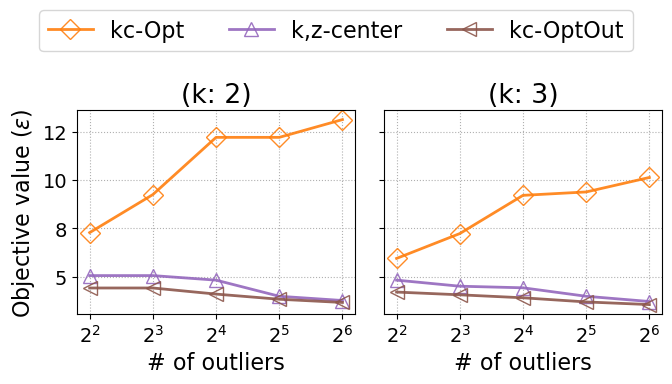

In [10]:

fig, ax = plt.subplots(1, 2, figsize = (7,4), sharey = True, sharex=True)

ax[0].yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax[1].yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

ax[0].xaxis.set_major_formatter(FormatStrFormatter('%i'))
ax[1].xaxis.set_major_formatter(FormatStrFormatter('%i'))

K_list = [2,3]
D = 2
for i, K in enumerate(tqdm(K_list)):
    
    df_maxdist = extractData(K,D,outliers_list )

    # cols = ['k,z-center', 'k,l-MinMax' ]
    cols = [ 'kc-Opt', 'k,z-center', 'kc-OptOut' ]


    for j, model in enumerate(cols):

        df_maxdist.plot(x = '# of outliers', y = model, marker = markers[j], fillstyle = 'none', color=col[j], ax = ax[i], markersize = 10, alpha = 0.9, linewidth = 2,legend = False)

    ax[i].set_ylabel('Objective value ('+r'$\varepsilon$'+')')
    ax[i].grid(True,linestyle = ':')
    # ax[i].set_title('\n\nNorm-Out (k: '+str(K)+')')
    ax[i].set_title('\n\n(k: '+str(K)+')')
    
    ax[i].tick_params(axis='both', which='major', labelsize=14)   

    ax[i].set_xscale('symlog', base = 2)

fig.tight_layout()
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels , loc='upper center', mode = 'False', ncol=len(df_maxdist.columns),fontsize = 16, markerscale = 1)

plt.savefig(f'{RESULT_DIR}/Syn4.pdf', bbox_inches = 'tight')
# plt.rcParams.update({'font.size': 22})
plt.show()